In [ ]:
##########################################################################

# I acknowledge the use of ChatGPT and AI Tools in Helping me Code and Debug the work in this File

##########################################################################




In [1]:
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt


# file_path = "/Users/marcosmaldacena/Downloads/Thesis Data/2024_2025_start.csv"

# df = pd.read_csv(file_path)

# file_path = "/scratch/network/mm4846/Thesis Data/Emploiyees_Yearly.csv"

# df2 = pd.read_csv(file_path)

# # file_path = ("/Users/marcosmaldacena/Downloads/Thesis Data/2006_2025_03_02_v9.csv")

# # df_combined = pd.read_csv(file_path)


# # path = ("/Users/marcosmaldacena/Downloads/Thesis Data/df_combined_neg.csv")

# # df_neg = pd.read_csv(path, usecols = ['ticker', 'date', 'assigned_quarter', 'question_answer_pairs', 
# #                                       'questions_only', 'negative_questions', 'num_negative_questions'])


# path =  "/scratch/network/mm4846/transcripts_2006_2025_03_18_enhanced.csv"

# df = pd.read_csv(path)
# file_path =  "/scratch/network/mm4846/transcripts_2006_2025_03_18_final_master.csv"
# df_enhanced = pd.read_csv(file_path), usecols = )

# path =  "/scratch/network/mm4846/vectors_v1_3_20.csv"

# df_vectors = pd.read_csv(path)

# path = "/scratch/network/mm4846/transcripts_2006_2025_03_18_enhanced_other_qs_v2.csv"

# df_others = pd.read_csv(path)

file_path = "/scratch/network/mm4846/transcripts_2006_2025_03_18_final_master_v2.csv"

# Load whole CSV (all 30k rows), then sample
df_master = pd.read_csv(file_path)

print(df_master)

       Unnamed: 0.10  Unnamed: 0.9  Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  \
0                  0             0          1283          1283          1283   
1                  1             1          1284          1284          1284   
2                  2             2          1855          1855          1855   
3                  3             3          1856          1856          1856   
4                  4             4          2008          2008          2008   
...              ...           ...           ...           ...           ...   
31867          31867         31867         36191         36191         33711   
31868          31868         31868         36192         36192         33712   
31869          31869         31869         36193         36193         33713   
31870          31870         31870         36194         36194         33714   
31871          31871         31871         36195         36195         33715   

       Unnamed: 0.5  Unnamed: 0.4  Unna

In [4]:
df_master.columns[:30]

Index(['Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7', 'Unnamed: 0.6',
       'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'ticker', 'year', 'quarter', 'date',
       'content', 'sector_name_mapped', 'group_name_mapped', 'ind_name_mapped',
       'subind_name_mapped', 'day_of_year', 'assigned_quarter', 'presentation',
       'qna', 'all_questions', 'question_answer_pairs',
       'question_answer_pairs_parsed', 'dividend_mentions_qna_question_count',
       'dividend_mentions_qna_answer_count', 'dividend_mentions_presentation',
       'geopolitical_mentions_qna_question_count'],
      dtype='object')

In [74]:
df_master['assigned_quarter']
# df_sample.columns[:30]


1283     2009Q1
1284     2009Q1
1855     2009Q4
1856     2009Q4
2008     2009Q4
          ...  
36191    2024Q4
36192    2024Q4
36193    2024Q4
36194    2024Q4
36195    2024Q4
Name: assigned_quarter, Length: 31872, dtype: object

In [8]:
# # df_others = df_others[df_others['year'] >= 2010]
# # print(df_others.columns)
# # df_master.columns

# merge_keys = ["ticker", "assigned_quarter"]

# # Select only columns from df_others that start with "other_" (if applicable) or specific ones
# df_others_columns = [col for col in df_others.columns if col.startswith("buyback_")]
# df_others_columns_2 = [col for col in df_others.columns if col.startswith("pandemic_")]

# # If you meant to keep all topic-related columns, modify this:
# # df_others_columns += [col for col in df_others.columns if col not in merge_keys]

# # Ensure merge keys are included in df_others
# df_others_columns = list(set(df_others_columns + df_others_columns_2 + merge_keys))

# # Subset df_others to only include necessary columns
# df_others_filtered = df_others[df_others_columns]

# # Merge on "ticker" and "assigned_quarter", keeping only relevant columns from df_others
# df_merged = df_master_2.merge(df_others_filtered, on=merge_keys, how="left")

# # Display result
# print(df_merged.head())

In [9]:
# file_path = "/scratch/network/mm4846/transcripts_2006_2025_03_18_enhanced_v4.csv"

# # Read only the header (column names) without loading the full dataset
# column_names = pd.read_csv(file_path, nrows=0).columns.tolist()

# print(column_names)  

In [10]:
# file_path = "/scratch/network/mm4846/transcripts_2006_2025_03_18_enhanced_v3.csv"
# chunksize = 1000  # Define chunk size

# # Read only relevant columns (exclude 'content' and 'presentation')
# df_headers = pd.read_csv(file_path, nrows=0)  # Read only the headers
# columns_to_use = [col for col in df_headers.columns if col not in ['content', 'presentation', 'qna', 'all_questions', 'qna_pairs']]

# filtered_data = []  # Store filtered chunks

# for chunk in pd.read_csv(file_path, chunksize=chunksize, usecols=columns_to_use):
#     filtered_chunk = chunk[chunk["year"] >= 2010]  # Keep rows where 'year' is 2010 or later
#     filtered_data.append(filtered_chunk)

# # Combine all filtered chunks
# df_master_2 = pd.concat(filtered_data, ignore_index=True)
# print(df_master_2.head())

In [7]:
# df_replace = df_updated.iloc[0].to_csv("/scratch/network/mm4846/Thesis Data/2006_2025_2-03_v6.csv")
# df_replace

In [11]:
# df2['ticker'] = df2['tic']
# df2_subset = df2[['ticker', 'gind', 'gsector', 'ggroup', 'gsubind']]

# df2_unique = df2.drop_duplicates(subset='ticker').set_index('ticker')

# # Then use 'map' for each column you want to bring into df:
# df_final['gind']    = df_final['ticker'].map(df2_unique['gind'])
# df_final['gsector'] = df_final['ticker'].map(df2_unique['gsector'])
# df_final['ggroup']  = df_final['ticker'].map(df2_unique['ggroup'])  
# df_final['gsubind'] = df_final['ticker'].map(df2_unique['gsubind'])

# df_final["sector_name_mapped"] = df_final["gsector"].map(sector_map)
# df_final["group_name_mapped"]  = df_final["ggroup"].map(industry_group_map)
# df_final["ind_name_mapped"]    = df_final["gind"].map(industry_map)
# df_final["subind_name_mapped"] = df_final["gsubind"].map(subindustry_map)
# df_final = df_final.drop(columns = ["gind", "gsector", "ggroup", "gsubind"])

# print(df_final)



In [12]:
# def assign_quarter_with_year(date, day_of_year):
#     year = date.year  # Extract the year from the date
#     if day_of_year >= 274:  # October 1 (approx start of Q4)
#         return f"{year}Q3"
#     elif day_of_year < 91:  # January 1 to March 31 (Q1)
#         return f"{year - 1}Q4"  # Use the previous year for Q4
#     elif day_of_year < 182:  # April 1 to June 30 (Q2)
#         return f"{year}Q1"
#     elif day_of_year < 274:  # July 1 to September 30 (Q3)
#         return f"{year}Q2"

# df['date'] = pd.to_datetime(df['date'])

# df['day_of_year'] = df['date'].dt.dayofyear

    
# # # Apply the function to assign quarters with years based on the date and day_of_year
# df['assigned_quarter'] = df.apply(
#     lambda row: assign_quarter_with_year(row['date'], row['day_of_year']), axis=1
# )




In [9]:
top_dates = df['date'].drop_duplicates().nlargest(3)
df_test = df[df['date'].isin(top_dates)]
df_test = df[df['date'] >= (df['date'].max())]

In [ ]:
import pandas as pd
from collections import defaultdict

def split_by_speaker(transcript):
    """Splits a transcript into structured format by speaker."""
    sections = re.split(r"\n([A-Z][a-zA-Z\s.,'’-]+(?:\s-\s[A-Z][a-zA-Z\s.,'’-]+)*):?\s*\n?", transcript)
    structured_qna = []

    for i in range(1, len(sections) - 1, 2):
        speaker = sections[i].strip()
        dialogue = sections[i + 1].strip()
        structured_qna.append({
            "speaker": speaker,
            "dialogue": dialogue
        })

    return structured_qna

def classify_speakers(qna_list):
    """Classifies speakers as executives, analysts, or operators based on word count and modifies question classification."""
    word_counts = defaultdict(int)
    for entry in qna_list:
        word_counts[entry['speaker']] += len(entry['dialogue'].split())

    speaker_types = {}
    for speaker, count in word_counts.items():
        if speaker.lower() == "operator":
            speaker_types[speaker] = "operator"
        elif count > 500:
            speaker_types[speaker] = "executive"
        else:
            speaker_types[speaker] = "analyst"

    for entry in qna_list:
        speaker = entry["speaker"]
        dialogue = entry["dialogue"]
        word_count = len(dialogue.split())
        num_question_marks = dialogue.count("?")

        entry["question_mark_count"] = num_question_marks
        entry["word_count"] = word_count

        # Assign speaker type
        entry["speaker_type"] = speaker_types[speaker]

        # Determine question_answer classification
        if entry["speaker_type"] == "operator":
            entry["question_answer"] = "operator"
        elif entry["speaker_type"] == "executive":
            entry["question_answer"] = "answer"
        elif entry["speaker_type"] == "analyst":
            if num_question_marks == 0 and word_count < 30:
                entry["question_answer"] = "dialogue"
            else:
                entry["question_answer"] = "question"
        else:
            entry["question_answer"] = "unknown"

    return qna_list

def separate_presentation_qna(qna_list):
    """Splits the transcript into presentation and Q&A sections."""
    running_word_count, qna_start = 0, None

    for i, entry in enumerate(qna_list):
        running_word_count += len(entry["dialogue"].split())
        if entry["speaker_type"] == "analyst" and running_word_count > 700:
            qna_start = i
            break

    presentation = qna_list[:qna_start] if qna_start else qna_list
    qna = qna_list[qna_start:] if qna_start else []

    # Assign question_answer labels
    for entry in presentation:
        entry["question_answer"] = "presentation" if entry["speaker_type"] != "operator" else "operator"

    for entry in qna:
        word_count = entry["word_count"]
        num_question_marks = entry["question_mark_count"]

        if entry["speaker_type"] == "operator":
            entry["question_answer"] = "operator"
        elif entry["speaker_type"] == "executive":
            entry["question_answer"] = "answer"
        elif entry["question_answer"] == "dialogue":
            continue  # Keep as dialogue if previously marked
        elif word_count >135 and num_question_marks == 0:
            entry["question_answer"] = "tentative"  # Apply "tentative" classification in Q&A only
        else:
            entry["question_answer"] = "question"

    return presentation, qna

def generate_question_answer_pairs(qna_list):
    """Creates question-answer pairs where the answer consists of all responses until the next question."""
    pairs = []
    current_question = None
    current_answer = []

    for entry in qna_list:
        if entry["question_answer"] == "question":
            if current_question:
                pairs.append({
                    "question": current_question,
                    "answer": " ".join(current_answer).strip()
                })
            current_question = entry["dialogue"]
            current_answer = []

        elif entry["question_answer"] in ["answer", "dialogue", "tentative"]:
            current_answer.append(entry["dialogue"])

    if current_question:
        pairs.append({
            "question": current_question,
            "answer": " ".join(current_answer).strip()
        })

    return pairs

def process_transcript(transcript):
    # 1) Split, 2) Classify, 3) Separate, 4) Generate pairs
    qna_list = split_by_speaker(transcript)
    qna_list = classify_speakers(qna_list)
    presentation_list, qna_list = separate_presentation_qna(qna_list)
    qna_pairs = generate_question_answer_pairs(qna_list)
    
    # Create a single string for the presentation
    presentation_text = " ".join(entry["dialogue"] for entry in presentation_list)
    
    # Create a single string for the Q&A portion
    qna_text = " ".join(entry["dialogue"] for entry in qna_list)

    return presentation_text, qna_text, qna_pairs



df = df.dropna(subset=["content"])
# print(df["content"].isna().sum())  # Counts NaN values

df[["presentation", "qna", "qna_pairs"]] = df["content"].apply(
    lambda txt: pd.Series(process_transcript(txt))
)
df['all_questions'] = df['qna_pairs'].apply(
    lambda pairs: [p["question"] for p in pairs if p.get("question")]
)
# df['all_answers'] = df['qna_pairs'].apply(
#     lambda pairs: [p["answer"] for p in pairs if p.get("answer")]
# )




In [ ]:
# 

In [23]:
file_path = "/scratch/network/mm4846/transcripts_2006_2025_03_18_enhanced_v3.csv"
# print(df.memory_usage(deep=True).sum() / 1e9, "GB")
# print(df.memory_usage().sum() / 1e9, "GB")  # Faster estimate
# print(df.head(1000).memory_usage(deep=True).sum() *30 / 1e9, "GB")  

# df.to_csv(file_path)
df_buyback = pd.read_csv(file_path)

In [13]:
# df.columns

In [36]:
# import ast
# import re  # <-- Enables regex usage
# import pandas as pd

# def count_mentions(text, word_list, compiled_patterns):
#     """Counts how many times any word in word_list appears in text as a whole word (not partial)."""
#     if not isinstance(text, str):
#         return 0
#     text_lower = text.lower()
#     return sum(len(pattern.findall(text_lower)) for pattern in compiled_patterns)

# def count_qa_mentions(qna_pairs, compiled_patterns):
#     """Return total number of mentions in questions and answers, respectively."""
#     question_mentions = 0
#     answer_mentions = 0
#     if isinstance(qna_pairs, list):
#         for pair in qna_pairs:
#             if isinstance(pair, dict):
#                 question_mentions += count_mentions(pair.get("question", ""), [], compiled_patterns)
#                 answer_mentions += count_mentions(pair.get("answer", ""), [], compiled_patterns)
#     return question_mentions, answer_mentions

# def count_qa_mentions_pairs(qna_pairs, compiled_patterns):
#     """Return (#pairs_with_mention_in_question, #pairs_with_mention_in_answer)."""
#     question_pairs_count = 0
#     answer_pairs_count = 0
#     if isinstance(qna_pairs, list):
#         for pair in qna_pairs:
#             if isinstance(pair, dict):
#                 question_mentioned = count_mentions(pair.get("question", ""), [], compiled_patterns) > 0
#                 answer_mentioned = count_mentions(pair.get("answer", ""), [], compiled_patterns) > 0
#                 if question_mentioned:
#                     question_pairs_count += 1
#                 if answer_mentioned:
#                     answer_pairs_count += 1
#     return question_pairs_count, answer_pairs_count

# def compile_patterns(word_list):
#     """Precompiles regex patterns for efficiency."""
#     return [re.compile(r'\b' + re.escape(term.lower()) + r'\b') for term in word_list]

# def add_topic_mention_columns(df, prefix, word_list):
#     """
#     A function that creates the various columns in df that count topic mentions.
#     Optimized using precompiled regex patterns.
#     """
#     compiled_patterns = compile_patterns(word_list)
    
#     # df[f"{prefix}_mentions_qna_question"], df[f"{prefix}_mentions_qna_answer"] = zip(*df["question_answer_pairs_parsed"].map(
#     #     lambda pairs: count_qa_mentions(pairs, compiled_patterns)
#     # ))
    
#     df[f"{prefix}_mentions_qna_question_count"], _ = zip(*df["question_answer_pairs_parsed"].map(
#         lambda pairs: count_qa_mentions_pairs(pairs, compiled_patterns)
#     ))
    
#     df[f"{prefix}_mentions_presentation"] = df["presentation"].map(lambda text: count_mentions(text, [], compiled_patterns))
    
#     return df

# def parse_stringified_list(df, column_name="question_answer_pairs"):
#     """Ensures column contains a list of dictionaries. Parses only if the row is a string."""
#     def safe_eval(val):
#         if isinstance(val, list):  # Already parsed
#             return val
#         try:
#             return ast.literal_eval(val) if isinstance(val, str) else []
#         except (ValueError, SyntaxError):
#             return []  # Return empty if parsing fails
    
#     parsed_column = "negative_questions_parsed" if column_name == "negative_questions" else "question_answer_pairs_parsed"
#     df[parsed_column] = df[column_name].map(safe_eval)
    
#     return df

# def process_topic_mentions(df, word_lists_with_prefixes):
#     """
#     Processes multiple word lists systematically by applying add_topic_mention_columns for each word list and prefix.
#     Optimized using precompiled regex patterns and efficient pandas operations.
    
#     :param df: Pandas DataFrame containing the relevant columns.
#     :param word_lists_with_prefixes: A dictionary where keys are prefixes and values are lists of words.
#     :return: Updated DataFrame with additional columns.
#     """
#     for prefix, word_list in word_lists_with_prefixes.items():
#         df = add_topic_mention_columns(df, prefix, word_list)
#     return df


In [7]:
import swifter

In [4]:
import ast
import re
import pandas as pd
import numpy as np
import swifter  # For automatic parallelization

def count_mentions(text, compiled_patterns):
    """Counts occurrences of compiled regex patterns in text."""
    if not isinstance(text, str):
        return 0
    text_lower = text.lower()
    return sum(len(pattern.findall(text_lower)) for pattern in compiled_patterns)

def count_qa_mentions(qna_pairs, compiled_patterns):
    """Return total mentions in questions and answers."""
    if not isinstance(qna_pairs, list):
        return 0, 0  # Avoid unnecessary looping

    question_mentions = sum(
        count_mentions(pair.get("question", ""), compiled_patterns) for pair in qna_pairs if isinstance(pair, dict)
    )
    answer_mentions = sum(
        count_mentions(pair.get("answer", ""), compiled_patterns) for pair in qna_pairs if isinstance(pair, dict)
    )

    return question_mentions, answer_mentions

def count_qa_mentions_pairs(qna_pairs, compiled_patterns):
    """Return (#pairs_with_mention_in_question, #pairs_with_mention_in_answer)."""
    if not isinstance(qna_pairs, list):
        return 0, 0  # Avoid unnecessary looping

    question_pairs_count = sum(
        count_mentions(pair.get("question", ""), compiled_patterns) > 0 for pair in qna_pairs if isinstance(pair, dict)
    )
    answer_pairs_count = sum(
        count_mentions(pair.get("answer", ""), compiled_patterns) > 0 for pair in qna_pairs if isinstance(pair, dict)
    )

    return question_pairs_count, answer_pairs_count

def compile_patterns(word_list):
    """Precompiles regex patterns for efficiency."""
    return [re.compile(r'\b' + re.escape(term.lower()) + r'\b') for term in word_list]

def add_topic_mention_columns(df, prefix, compiled_patterns, original_word_list):
    qa_counts = np.stack(df["question_answer_pairs_parsed"].swifter.apply(
        lambda pairs: count_qa_mentions_pairs(pairs, compiled_patterns)
    ).to_numpy())

    df[f"{prefix}_mentions_qna_question_count"] = qa_counts[:, 0]

    # Correct: Use original word list directly
    # df[f"{prefix}_presentation_distinct_mentions"] = df["presentation"].swifter.apply(
    #     lambda text: count_distinct_mentions_in_text(text, original_word_list)
    # )

    return df


def count_distinct_mentions_in_text(text, topic_terms, cooldown_distance=120):
    """Count distinct bursts of topic mentions using a cooldown threshold in word distance."""
    if not isinstance(text, str):
        return 0

    text = text.lower()
    words = re.findall(r'\w+', text)  # Basic tokenizer
    word_positions = []

    # Collect positions where a topic term starts
    for i in range(len(words)):
        for term in topic_terms:
            term_words = term.lower().split()
            if words[i:i + len(term_words)] == term_words:
                word_positions.append(i)
                break  # Avoid counting overlapping terms multiple times

    # Group positions by cooldown logic
    if not word_positions:
        return 0

    mentions = 1
    last_pos = word_positions[0]
    for pos in word_positions[1:]:
        if pos - last_pos > cooldown_distance:
            mentions += 1
            last_pos = pos

    return mentions



def parse_stringified_list(df, column_name="question_answer_pairs"):
    """Ensures column contains a list of dictionaries. Parses only if the row is a string."""
    def safe_eval(val):
        if isinstance(val, list):  # Already parsed
            return val
        try:
            return ast.literal_eval(val) if isinstance(val, str) else []
        except (ValueError, SyntaxError):
            return []  # Return empty if parsing fails
    
    parsed_column = "negative_questions_parsed" if column_name == "negative_questions" else "question_answer_pairs_parsed"
    
    # Use parallelized `.swifter.apply()` for fast processing
    df[parsed_column] = df[column_name].swifter.apply(safe_eval)

    return df

def process_topic_mentions(df, word_lists_with_prefixes):
    """
    Processes multiple word lists systematically.
    Optimized with precompiled regex and parallelized operations.
    """
    compiled_patterns_dict = {prefix: compile_patterns(word_list) for prefix, word_list in word_lists_with_prefixes.items()}
    for prefix, compiled_patterns in compiled_patterns_dict.items():
        df = add_topic_mention_columns(df, prefix, compiled_patterns, word_lists_with_prefixes[prefix])

    return df


/home/mm4846/.conda/envs/myenv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# df_beginning = df.iloc[:20]
# df_master['question_answer_pairs'] = df_master['qna_pairs']
# df_master = parse_stringified_list(df_master)
df_master = process_topic_mentions(df_master, word_lists_with_prefixes)

Pandas Apply: 100%|██████████| 31872/31872 [12:37<00:00, 42.06it/s] 


In [8]:
file_path = "/scratch/network/mm4846/transcripts_2006_2025_03_18_final_master_v2.csv"

df_master.to_csv(file_path)

In [70]:
# print(df2['operational_mentions_presentation'])
# print(df2['operational_presentation_distinct_mentions'])

# print(df2['presentation'][5483])
# print(df2.columns[90:]) 

# df2['pandemic_mentions_qna_question_count']
# df_beginning
df2 

,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ticker,year,...,buyback_mentions_qna_answer_count,buyback_mentions_presentation,pandemic_mentions_qna_answer_count,pandemic_mentions_presentation,other_qna_question_count,political_mentions_presentation,political_mentions_qna_question_count,buyback_mentions_qna_question_count,pandemic_mentions_qna_question_count,buyback_presentation_distinct_mentions
0,0,0,0,0,0,0,0,0.0,DELL,2005,...,0,3,0,0,NaN,NaN,NaN,NaN,NaN,1
1,1,1,1,1,1,1,1,1.0,DELL,2006,...,0,8,0,0,NaN,NaN,NaN,NaN,NaN,1
2,2,2,2,2,2,2,2,2.0,DELL,2006,...,0,4,0,0,NaN,NaN,NaN,NaN,NaN,2
3,3,3,3,3,3,3,3,3.0,DELL,2006,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,1
4,4,4,4,4,4,4,4,4.0,DELL,2006,...,0,7,0,0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36191,36191,33711,32471,31851,31467,31468,31468,NaN,SO,2024,...,0,0,0,0,15.0,0.0,0.0,0.0,0.0,0
36192,36192,33712,32472,31852,31468,31469,31469,NaN,SPGI,2024,...,0,4,0,0,11.0,0.0,1.0,0.0,0.0,1
36193,36193,33713,32473,31853,31469,31470,31470,NaN,UNP,2024,...,0,0,0,0,10.0,0.0,0.0,0.0,1.0,0
36194,36194,33714,32474,31854,31470,31471,31471,NaN,XEL,2024,...,0,1,0,0,14.0,0.0,1.0,0.0,0.0,1


In [13]:
file_path = "/scratch/network/mm4846/transcripts_2006_2025_03_18_pand_buyback.csv"

df2.to_csv(file_path)


In [2]:
file_path = "/scratch/network/mm4846/transcripts_2006_2025_03_18_enhanced_v4.csv"

# Read only the header (column names) without loading the full dataset
column_names = pd.read_csv(file_path, nrows=0).columns.tolist()

print(column_names)  # Display column names

['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'ticker', 'year', 'quarter', 'date', 'content', 'sector_name_mapped', 'group_name_mapped', 'ind_name_mapped', 'subind_name_mapped', 'day_of_year', 'assigned_quarter', 'presentation', 'qna', 'qna_pairs', 'all_questions', 'question_answer_pairs', 'question_answer_pairs_parsed', 'dividend_mentions_qna_question_count', 'dividend_mentions_qna_answer_count', 'dividend_mentions_presentation', 'geopolitical_mentions_qna_question_count', 'geopolitical_mentions_qna_answer_count', 'geopolitical_mentions_presentation', 'geopolitical_2_mentions_qna_question_count', 'geopolitical_2_mentions_qna_answer_count', 'geopolitical_2_mentions_presentation', 'climate_mentions_qna_question_count', 'climate_mentions_qna_answer_count', 'climate_mentions_presentation', 'outperform_mentions_qna_question_count', 'outperform_mentions_qna_answer_count', 'outperform_mentions_presentation', 'supply_chain_mentions_qna_question_count', 'supply

In [ ]:
# merged_df_2.columns

In [4]:
# df4_v2 = process_topic_mentions(df4, word_lists_with_prefixes_2)



In [20]:
# df4_v2.to_csv(file_path)

In [3]:
# print(df4_v2.columns)
# print(df.columns)

In [5]:
# merged_df = pd.merge(df, df4_v2, on=['ticker', 'assigned_quarter'], how='outer')

# merged_df = merged_df[[col for col in merged_df.columns if not col.endswith("_y")]]

# # Rename columns that end with "_x" by removing the "_x" suffix
# merged_df = merged_df.rename(columns={col: col[:-2] for col in merged_df.columns if col.endswith("_x")})
# merged_df.columns[:59]
# file_path = "/scratch/network/mm4846/transcripts_2006_2025_03_18_master.csv"

# merged_df.to_csv(file_path)


# Select base columns
# base_columns = ['ticker', 'date', 'assigned_quarter', 'quarter', 'year']

# # Extract all columns ending with "_presentation"
# presentation_columns = [col for col in df.columns if col.endswith("_presentation")]

# # Extract all columns ending with "_qna_question_count"
# qna_question_columns = [col for col in df.columns if col.endswith("_qna_question_count")]

# # Create new dataframe with the desired structure
# df_final = df[base_columns + presentation_columns + qna_question_columns]

# df_final

In [6]:
# df2 = df2.drop(columns = [ 'buyback_mentions_qna_answer','buyback_mentions_qna_answer_count'])
# merged_df.columns

In [6]:
# merged_df = df.copy()
# presentation_columns = sorted([col for col in merged_df.columns if col.endswith("_presentation")])

# # Extract all columns ending with "_qna_question_count" and keep them in order
# qna_question_columns = sorted([col for col in merged_df.columns if col.endswith("_qna_question_count")])

# # Create a new dataframe with base columns
# df_final = merged_df[base_columns].copy()

# # Store presentation values as a list in a single column
# df_final["presentation_vector"] = merged_df[presentation_columns].values.tolist()

# # Store qna_question_count values as a list in a single column
# df_final["qna_question_vector"] = merged_df[qna_question_columns].values.tolist()

# # Create mapping of topics to index (for _presentation columns)
# presentation_mapping = {col.replace("_presentation", ""): idx for idx, col in enumerate(presentation_columns)}

# # Create mapping of topics to index (for _qna_question_count columns)
# qna_question_mapping = {col.replace("_qna_question_count", ""): idx for idx, col in enumerate(qna_question_columns)}

# # # Display the final dataframe
# # import ace_tools as tools
# # tools.display_dataframe_to_user(name="Final DataFrame with Vectors", dataframe=df_final)

# # Print the mappings
# print("Presentation Mapping:", presentation_mapping)
# print("QnA Question Count Mapping:", qna_question_mapping)

In [29]:
df_final.columns

Index(['ticker', 'date', 'assigned_quarter', 'quarter', 'year',
       'presentation_vector', 'qna_question_vector',
       'presentation_recurring_vector', 'presentation_episodic_vector',
       'presentation_less_frequent_vector', 'qna_question_recurring_vector',
       'qna_question_episodic_vector', 'qna_question_less_frequent_vector',
       'recurring_sum', 'episodic_sum', 'less_frequent_sum', 'recurring_count',
       'episodic_count', 'less_frequent_count', 'recurring_sum_qna',
       'episodic_sum_qna', 'less_frequent_sum_qna', 'recurring_count_qna',
       'episodic_count_qna', 'less_frequent_count_qna'],
      dtype='object')

In [11]:
recurring_indices = [presentation_mapping[term + "_mentions"] for term in recurring_terms if term + "_mentions" in presentation_mapping]
episodic_indices = [presentation_mapping[term + "_mentions"] for term in episodic_terms if term + "_mentions" in presentation_mapping]
less_frequent_indices = [presentation_mapping[term + "_mentions"] for term in less_frequent if term + "_mentions" in presentation_mapping]

# Debug - Check the extracted indices
print("Recurring Indices:", recurring_indices)
print("Episodic Indices:", episodic_indices)
print("Less Frequent Indices:", less_frequent_indices)

# Step 2: Function to filter vectors by selected indices
def filter_and_apply_vectors(df, vector_column, output_prefix, indices_dict):
    for category, indices in indices_dict.items():
        df[f"{output_prefix}_{category}_vector"] = df[vector_column].apply(lambda vec: [vec[idx] if idx < len(vec) else 0 for idx in indices] if isinstance(vec, list) else [])
    return df

# Step 3: Apply function to both presentation_vector and qna_question_count_vector
df_final = filter_and_apply_vectors(df_final, "presentation_vector", "presentation", {
    "recurring": recurring_indices,
    "episodic": episodic_indices,
    "less_frequent": less_frequent_indices
})

df_final = filter_and_apply_vectors(df_final, "qna_question_vector", "qna_question", {
    "recurring": recurring_indices,
    "episodic": episodic_indices,
    "less_frequent": less_frequent_indices
})

# Debug - Check first few rows to ensure it's working
print("First row - presentation recurring vector:", df_final["presentation_recurring_vector"].iloc[0])
print("First row - presentation episodic vector:", df_final["presentation_episodic_vector"].iloc[26000])
print("First row - presentation less frequent vector:", df_final["presentation_less_frequent_vector"].iloc[0])
print("First row - qna recurring vector:", df_final["qna_question_recurring_vector"].iloc[0])
print("First row - qna episodic vector:", df_final["qna_question_episodic_vector"].iloc[26000])
print("First row - qna less frequent vector:", df_final["qna_question_less_frequent_vector"].iloc[0])


Recurring Indices: [8, 1, 7, 12, 17, 18, 21, 25]
Episodic Indices: [14, 13, 24, 10, 4, 0, 23, 16, 2, 3]
Less Frequent Indices: [9, 5, 20, 15, 6, 22, 5, 19]
First row - presentation recurring vector: [0, 2, 2, 0, 0, 10, 1, 5]
First row - presentation episodic vector: [4, 0, 0, 1, 0, 0, 0, 0, 0, 0]
First row - presentation less frequent vector: [0, 0, 2, 0, 0, 0, 0, 2]
First row - qna recurring vector: [0, 0, 1, 1, 0, 3, 0, 0]
First row - qna episodic vector: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
First row - qna less frequent vector: [0, 0, 0, 0, 0, 0, 0, 0]


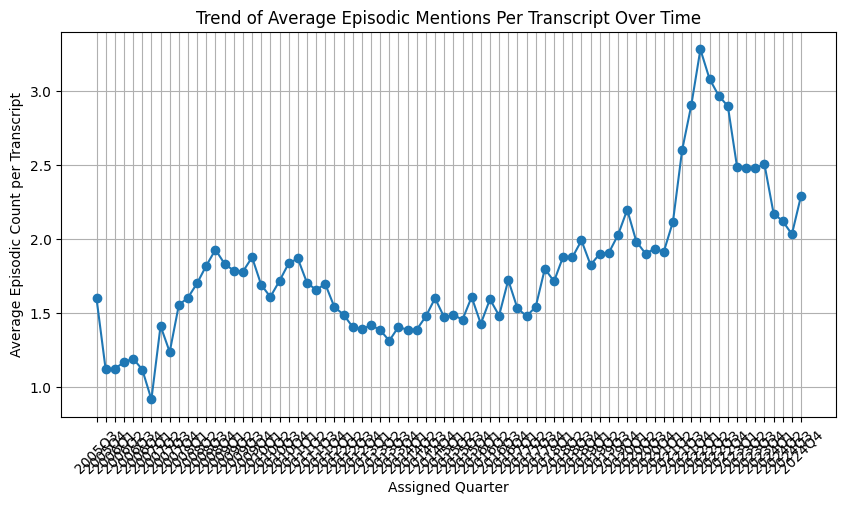

In [15]:
df_final["recurring_sum"] = df_final["presentation_recurring_vector"].apply(sum)
df_final["episodic_sum"] = df_final["presentation_episodic_vector"].apply(sum)
df_final["less_frequent_sum"] = df_final["presentation_less_frequent_vector"].apply(sum)

# Step 2: Create count of nonzero values (number of nonzero mentions)
df_final["recurring_count"] = df_final["presentation_recurring_vector"].apply(lambda vec: sum(1 for v in vec if v > 0))
df_final["episodic_count"] = df_final["presentation_episodic_vector"].apply(lambda vec: sum(1 for v in vec if v > 0))
df_final["less_frequent_count"] = df_final["presentation_less_frequent_vector"].apply(lambda vec: sum(1 for v in vec if v > 0))


df_final["recurring_sum_qna"] = df_final["qna_question_recurring_vector"].apply(sum)
df_final["episodic_sum_qna"] = df_final["qna_question_episodic_vector"].apply(sum)
df_final["less_frequent_sum_qna"] = df_final["qna_question_less_frequent_vector"].apply(sum)

# Step 2: Create count of nonzero values (number of nonzero mentions)
df_final["recurring_count_qna"] = df_final["qna_question_recurring_vector"].apply(lambda vec: sum(1 for v in vec if v > 0))
df_final["episodic_count_qna"] = df_final["qna_question_episodic_vector"].apply(lambda vec: sum(1 for v in vec if v > 0))
df_final["less_frequent_count_qna"] = df_final["qna_question_less_frequent_vector"].apply(lambda vec: sum(1 for v in vec if v > 0))




# # Step 3: Aggregate number of companies mentioning episodic terms by assigned_quarter
# average_episodic_count_per_transcript = df_final.groupby("assigned_quarter")["episodic_count"].mean()

# # Step 4: Plot the trend over time
# plt.figure(figsize=(10, 5))
# plt.plot(average_episodic_count_per_transcript.index, average_episodic_count_per_transcript.values, marker='o', linestyle='-')
# plt.xlabel("Assigned Quarter")
# plt.ylabel("Average Episodic Count per Transcript")
# plt.title("Trend of Average Episodic Mentions Per Transcript Over Time")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()


In [36]:
import matplotlib.pyplot as plt

def plot_trend(df, mention_type="episodic", section="presentation", sector=None, start_year=None, end_year=None):
    """
    Plots the trend of average mentions per transcript over time, 
    with optional filtering by mention type, section, sector, and year range.

    Parameters:
    - df (pd.DataFrame): The input dataframe.
    - mention_type (str): Choose from "episodic", "recurring", or "less_frequent".
    - section (str): Choose from "presentation" or "qna_question".
    - sector (str, optional): Filter for a specific sector (uses 'sector_name_mapped' column).
    - start_year (int, optional): Start year for filtering.
    - end_year (int, optional): End year for filtering.
    
    Returns:
    - None (displays the plot).
    """
    
    # Construct the correct column name based on the inputs
    column_name = f"{mention_type}_count" if section == "presentation" else f"{mention_type}_count_qna"
    
    if column_name not in df.columns:
        raise ValueError(f"Invalid column '{column_name}'. Check 'mention_type' and 'section' inputs.")

    # Create a filtered copy of the dataframe
    filtered_df = df.copy()

    # Apply sector filter if provided and if column exists
    if sector:
        if "sector_name_mapped" not in df.columns:
            raise ValueError("The column 'sector_name_mapped' does not exist in the dataset.")
        if sector not in df["sector_name_mapped"].unique():
            raise ValueError(f"Sector '{sector}' not found in 'sector_name_mapped' column.")
        
        filtered_df = filtered_df[filtered_df["sector_name_mapped"] == sector]

    # Apply year range filter if provided
    if start_year or end_year:
        if "assigned_quarter" not in df.columns:
            raise ValueError("The column 'assigned_quarter' does not exist in the dataset.")
        
        filtered_df["year"] = filtered_df["assigned_quarter"].astype(str).str[:4].astype(int)  # Extract year from quarter
        
        if start_year:
            filtered_df = filtered_df[filtered_df["year"] >= start_year]
        if end_year:
            filtered_df = filtered_df[filtered_df["year"] <= end_year]

    # Compute the average count per transcript
    avg_mentions_per_transcript = filtered_df.groupby("assigned_quarter")[column_name].mean()

    # Ensure there is data to plot
    if avg_mentions_per_transcript.empty:
        print(f"No data available for the given filters: mention_type={mention_type}, section={section}, sector={sector}, years={start_year}-{end_year}")
        return

    # Plot the trend over time
    plt.figure(figsize=(10, 5))
    plt.plot(avg_mentions_per_transcript.index, avg_mentions_per_transcript.values, marker='o', linestyle='-')
    plt.xlabel("Assigned Quarter")
    plt.ylabel(f"Average {mention_type.capitalize()} Count per Transcript ({section.replace('_', ' ').capitalize()})")
    plt.title(f"Trend of Average {mention_type.capitalize()} Mentions Per Transcript Over Time ({section.replace('_', ' ').capitalize()})")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


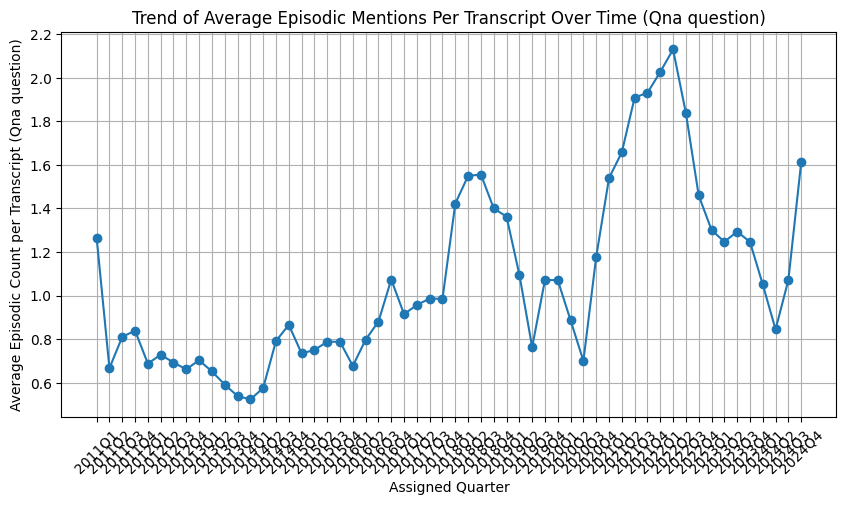

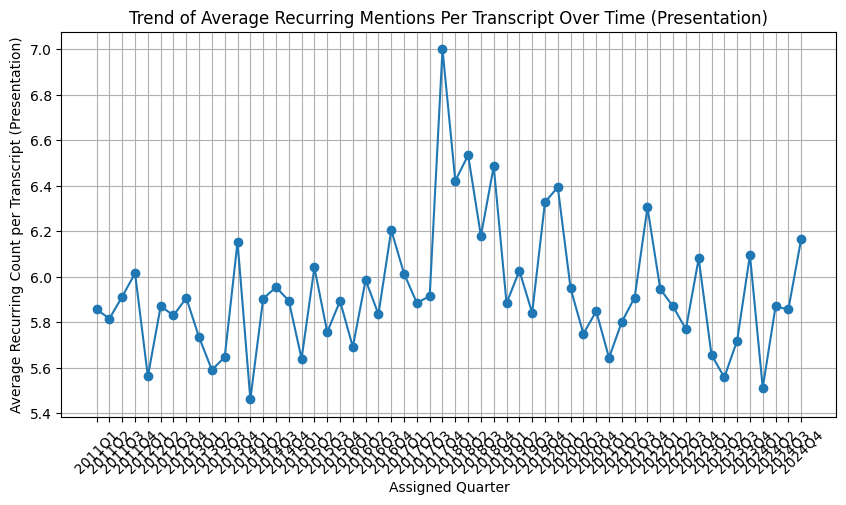

In [50]:
plot_trend(df_final, mention_type="episodic", section="qna_question", sector="Industrials", start_year=2011, end_year=2025)
plot_trend(df_final, mention_type="recurring", section="presentation", sector="Industrials", start_year=2011, end_year=2025)


In [35]:
df_final.to_csv("/scratch/network/mm4846/vectors_v1_3_20.csv")

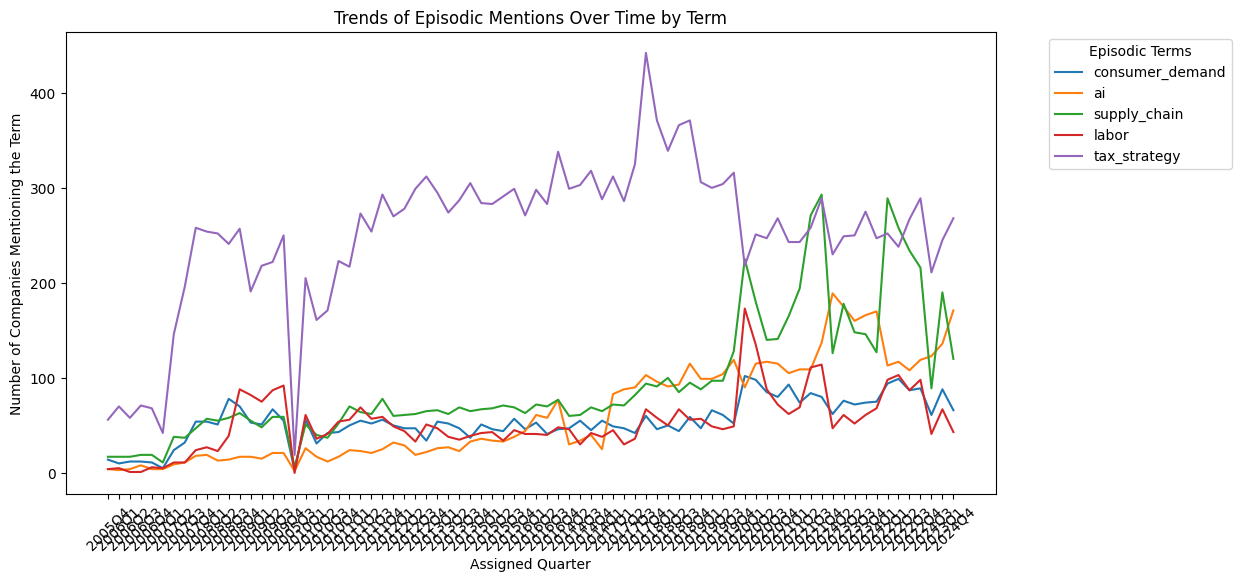

In [114]:
episodic_term_trends = pd.DataFrame(index=df_final["assigned_quarter"].unique())

# Step 2: Extract values from the vector using presentation_mapping
for term in episodic_terms:
    term_index = presentation_mapping.get(term + "_mentions")  # Get the correct index
    if term_index is not None:  # Ensure the term exists in the mapping
        episodic_term_trends[term] = df_final.groupby("assigned_quarter")["presentation_vector"].apply(
            lambda x: sum(1 for vec in x if vec[term_index] > 0)  # Count companies with nonzero mentions
        )


# Step 3: Plot each episodic term as a separate line
plt.figure(figsize=(12, 6))

for term in episodic_term_trends.columns[5:10]:
    plt.plot(episodic_term_trends.index, episodic_term_trends[term],  linestyle='-', label=term)

plt.xlabel("Assigned Quarter")
plt.ylabel("Number of Companies Mentioning the Term")
plt.title("Trends of Episodic Mentions Over Time by Term")
plt.xticks(rotation=45)
plt.legend(title="Episodic Terms", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
plt.show()
            
           



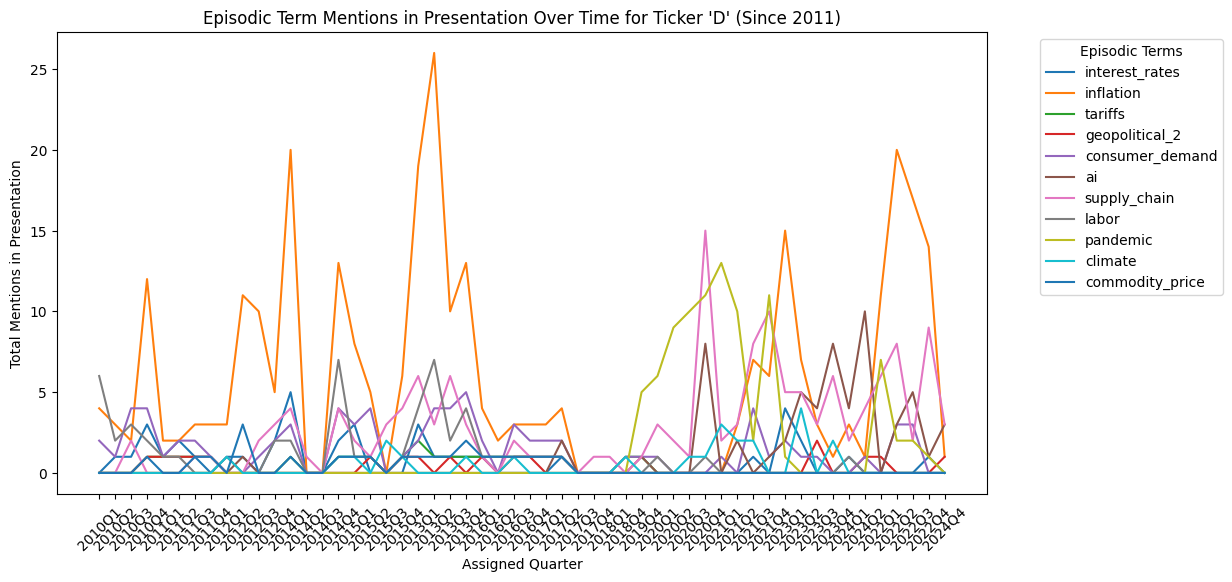

In [123]:
d_ticker_df = df_final[(df_final["ticker"] == "WMT") & (df_final["year"].astype(int) >= 2011)]

# Create an empty DataFrame with assigned_quarter as index
episodic_mentions_trends = pd.DataFrame(index=d_ticker_df["assigned_quarter"].unique())

# Extract values from the vector using presentation_mapping
for term in episodic_terms:
    term_index = presentation_mapping.get(term + "_mentions")  # Get the correct index
    if term_index is not None:  # Ensure the term exists in the mapping
        episodic_mentions_trends[term] = d_ticker_df.groupby("assigned_quarter")["presentation_vector"].apply(
            lambda x: sum(vec[term_index] for vec in x if isinstance(vec, list) and len(vec) > term_index)  # Sum mentions per quarter
        )

# Step 3: Plot each episodic term as a separate line
plt.figure(figsize=(12, 6))

for term in episodic_mentions_trends.columns:
    plt.plot(episodic_mentions_trends.index, episodic_mentions_trends[term], linestyle='-', label=term)

plt.xlabel("Assigned Quarter")
plt.ylabel("Total Mentions in Presentation")
plt.title("Episodic Term Mentions in Presentation Over Time for Ticker 'D' (Since 2011)")
plt.xticks(rotation=45)
plt.legend(title="Episodic Terms", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [113]:
df_final

,ticker,date,assigned_quarter,quarter,year,sector_name_mapped,ind_name_mapped,group_name_mapped,subind_name_mapped,presentation_vector,...,less_frequent_sum,recurring_count,episodic_count,less_frequent_count,presentation_recurring_vector,presentation_episodic_vector,presentation_less_frequent_vector,qna_question_recurring_vector,qna_question_episodic_vector,qna_question_less_frequent_vector
0,DELL,2006-01-26 11:39:13,2005Q4,4,2005,Information Technology,"Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","[0, 3, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, ...",...,4,5,2,2,"[3, 0, 2, 2, 0, 0, 10, 1]","[0, 0, 0, 4, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0]","[0, 0, 2, 0, 0, 0, 2]","[0, 0, 0, 1, 1, 0, 3, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0]"
1,DELL,2006-04-20 12:46:09,2006Q1,1,2006,Information Technology,"Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","[0, 8, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 8, 1, 0, ...",...,2,6,4,1,"[8, 0, 0, 2, 1, 1, 9, 2]","[0, 0, 0, 8, 1, 1, 0, 0, 0, 6, 0, 0, 0, 0]","[0, 0, 2, 0, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0]"
2,DELL,2006-07-14 12:00:43,2006Q2,2,2006,Information Technology,"Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","[0, 4, 1, 0, 0, 2, 0, 0, 9, 0, 0, 0, 6, 5, 0, ...",...,1,6,4,1,"[4, 0, 1, 9, 5, 0, 5, 2]","[0, 0, 0, 6, 0, 2, 0, 1, 0, 4, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0]"
3,DELL,2006-10-17 13:18:26,2006Q3,3,2006,Information Technology,"Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","[0, 1, 0, 0, 0, 0, 0, 1, 7, 0, 0, 0, 20, 1, 0,...",...,11,5,2,3,"[1, 0, 0, 7, 1, 0, 13, 4]","[0, 0, 0, 20, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0]","[0, 0, 8, 1, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 2, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0]"
4,DELL,2007-01-23 12:15:14,2006Q4,4,2006,Information Technology,"Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","[1, 7, 1, 0, 0, 0, 0, 0, 8, 0, 0, 0, 22, 7, 0,...",...,4,6,3,2,"[7, 0, 1, 8, 7, 0, 9, 2]","[0, 0, 0, 22, 0, 0, 1, 0, 0, 22, 0, 0, 0, 0]","[0, 0, 3, 0, 0, 0, 1]","[0, 0, 0, 3, 4, 1, 6, 0]","[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 3, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31851,SO,2025-02-20 13:00:00,2024Q4,4,2024,Utilities,Electric Utilities,Utilities,Electric Utilities,"[0, 0, 2, 1, 0, 0, 0, 0, 2, 7, 1, 0, 0, 12, 0,...",...,5,5,1,2,"[0, 7, 2, 2, 12, 0, 0, 4]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[1, 0, 4, 0, 0, 0, 0]","[0, 1, 3, 2, 0, 0, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0]"
31852,SPGI,2025-02-11 08:30:00,2024Q4,4,2024,Financials,Capital Markets,Financial Services,Financial Exchanges & Data,"[8, 4, 1, 1, 0, 0, 0, 0, 10, 4, 1, 1, 4, 10, 2...",...,6,8,7,3,"[4, 4, 1, 10, 10, 21, 38, 1]","[5, 2, 1, 4, 1, 0, 8, 0, 0, 0, 0, 1, 0, 0]","[1, 0, 1, 0, 0, 0, 4]","[0, 0, 0, 1, 2, 0, 3, 0]","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 2, 0, 0, 0, 0]"
31853,UNP,2025-01-23 08:45:00,2024Q4,4,2024,Industrials,Ground Transportation,Transportation,Rail Transportation,"[0, 0, 2, 0, 0, 0, 0, 0, 8, 3, 0, 0, 0, 2, 4, ...",...,1,7,7,1,"[0, 3, 2, 8, 2, 2, 14, 1]","[1, 4, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 1]","[0, 0, 0, 2, 2, 0, 3, 3]","[0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1]"
31854,XEL,2025-02-06 10:00:00,2024Q4,4,2024,Utilities,Electric Utilities,Utilities,Electric Utilities,"[0, 1, 0, 6, 0, 0, 0, 0, 6, 0, 0, 0, 6, 8, 1, ...",...,3,5,4,1,"[1, 0, 0, 6, 8, 0, 3, 1]","[0

In [3]:
word_lists_with_prefixes = {
    # "buyback": share_buyback_bigrams,
    # "pandemic": pandemic_terms,
    # "political" : pol_bigrams,   
    # "dividend": dividend_bigrams,
    # "geopolitical_2": geopolitical_terms_2,
    # "climate": climate_terms,
    # "m_and_a": ma_spin_terms, 
    # "outperform": outperform_terms,
    # "supply_chain": supply_chain_terms,
    # "tariffs": tariffs_terms,
    # "inflation": inflation_terms,
    # "capex": capex_terms, 
    # "reshoring": reshoring_terms,
    # "debt": debt_terms,
    # "commodity_price": commodity_price_terms,
    # "consumer_demand": consumer_demand_terms,
    # "operational": operational_terms,
    # "guidance_forecasts": guidance_forecasts_terms,
    # "rd": rd_terms,
    # "esg_sustainability": esg_sustainability_terms,
    # "cybersecurity_data_protection": cybersecurity_data_protection_terms,
    # "currency_fluctuations_hedging": currency_fluctuations_hedging_terms,
    # "regulation": regulation_terms,
    # "liquidity_cash_flow": liquidity_cash_flow_terms,
    # "tax_strategy": tax_strategy_terms,
    # "ai": ai_terms,  
    # "interest_rates": interest_rate_terms,
    "labor": labor_terms 
}


In [18]:
word_lists_with_prefixes_2 = {
    # "buyback": share_buyback_bigrams,
        # "pandemic": pandemic_terms,
    # "dividend": dividend_bigrams,
    # "geopolitical": geopolitical_terms,
    # "geopolitical_2": geopolitical_terms_2,
    # "climate": climate_terms,
    # "outperform": outperform_terms,
    # "supply_chain": supply_chain_terms,
    # "tariffs": tariffs_terms,
    # "inflation": inflation_terms,
    # "capex": capex_terms,
    # "labor_cost": labor_cost_terms,
    # "reshoring": reshoring_terms,
    # "debt": debt_terms,
    # "commodity_price": commodity_price_terms,
    # "consumer_demand": consumer_demand_terms,
    # "operational": operational_terms,
    # "guidance_forecasts": guidance_forecasts_terms,
    # "rd": rd_terms,
    # "esg_sustainability": esg_sustainability_terms,
    # "cybersecurity_data_protection": cybersecurity_data_protection_terms,
    # "currency_fluctuations_hedging": currency_fluctuations_hedging_terms,
    "regulation": regulation_terms,
    "liquidity_cash_flow": liquidity_cash_flow_terms,
    "tax_strategy": tax_strategy_terms,
    "ai": ai_terms,
    "interest_rates": interest_rate_terms,
    "labor": labor_terms 
}


In [22]:
macroeconomic_terms = [
    "interest_rates", "inflation", "currency_fluctuations_hedging", "geopolitical", "geopolitical_2",
    "consumer_demand", 
]

corporate_finance_terms = [
    "buyback", "dividend", "capex", "debt", "guidance_forecasts", "liquidity_cash_flow",  "operational", "tax_strategy"]




policy_terms = ["political", "tariffs", "regulation"]


other_trends_terms = [
"rd",    "outperform", "esg_sustainability", "ai", "pandemic", "climate",  "labor",  "rd", "labor_cost", "reshoring",
    "supply_chain", "cybersecurity_data_protection" , "commodity_price"
]

In [7]:
recurring_terms = ["buyback", "dividend", "capex", "debt",  "guidance_forecasts", "liquidity_cash_flow",  "operational",  "regulation", "tax_strategy"]
episodic_terms = ["interest_rates", "inflation", "tariffs", "geopolitical_2", 
    "consumer_demand", "ai",  "supply_chain",  "labor", "pandemic", "climate",  "commodity_price"]

less_frequent = ["esg_sustainability", "currency_fluctuations_hedging",  "rd", "labor_cost", "cybersecurity_data_protection", "reshoring", "currency_fluctuations_hedging", "outperform"]

In [32]:


sector_map = {
    10: "Energy",
    15: "Materials",
    20: "Industrials",
    25: "Consumer Discretionary",
    30: "Consumer Staples",
    35: "Health Care",
    40: "Financials",
    45: "Information Technology",
    50: "Communication Services",
    55: "Utilities",
    60: "Real Estate"
}
industry_group_map = {
    1010: "Energy",
    1510: "Materials",
    2010: "Capital Goods",
    2020: "Commercial & Professional Services",
    2030: "Transportation",
    2510: "Automobiles & Components",
    2520: "Consumer Durables & Apparel",
    2530: "Consumer Services",
    2550: "Consumer Discretionary Distribution & Retail",
    3010: "Consumer Staples Distribution & Retail",
    3020: "Food, Beverage & Tobacco",
    3030: "Household & Personal Products",
    3510: "Health Care Equipment & Services",
    3520: "Pharmaceuticals, Biotechnology & Life Sciences",
    4010: "Banks",
    4020: "Financial Services",
    4030: "Insurance",
    4510: "Software & Services",       # GICS uses 4510 for the entire group,
    #  -- note that GICS also further splits 4510 into 451020, 451030 for Industries
    4510: "Software & Services",       # repeated key is typically not needed, see details below
    4520: "Technology Hardware & Equipment",
    4530: "Semiconductors & Semiconductor Equipment",
    5010: "Telecommunication Services",
    5020: "Media & Entertainment",
    5510: "Utilities",
    6010: "Equity Real Estate Investment Trusts (REITs)",
    6020: "Real Estate Management & Development"
}



industry_map = {
    # -- Sector 10: Energy
    101010: "Energy Equipment & Services",
    101020: "Oil, Gas & Consumable Fuels",
    
    # -- Sector 15: Materials
    151010: "Chemicals",
    151020: "Construction Materials",
    151030: "Containers & Packaging",
    151040: "Metals & Mining",
    151050: "Paper & Forest Products",
    
    # -- Sector 20: Industrials
    201010: "Aerospace & Defense",
    201020: "Building Products",
    201030: "Construction & Engineering",
    201040: "Electrical Equipment",
    201050: "Industrial Conglomerates",
    201060: "Machinery",
    201070: "Trading Companies & Distributors",
    202010: "Commercial Services & Supplies",
    202020: "Professional Services",
    203010: "Air Freight & Logistics",
    203020: "Passenger Airlines",
    203030: "Marine Transportation",
    203040: "Ground Transportation",
    203050: "Transportation Infrastructure",
    
    # -- Sector 25: Consumer Discretionary
    251010: "Automobile Components",
    251020: "Automobiles",
    252010: "Household Durables",
    252020: "Leisure Products",
    252030: "Textiles, Apparel & Luxury Goods",
    253010: "Hotels, Restaurants & Leisure",
    253020: "Diversified Consumer Services",
    255010: "Distributors",
    255030: "Broadline Retail",
    255040: "Specialty Retail",
    
    # -- Sector 30: Consumer Staples
    301010: "Consumer Staples Distribution & Retail",
    302010: "Beverages",
    302020: "Food Products",
    302030: "Tobacco",
    303010: "Household Products",
    303020: "Personal Care Products",
    
    # -- Sector 35: Health Care
    351010: "Health Care Equipment & Supplies",
    351020: "Health Care Providers & Services",
    351030: "Health Care Technology",
    352010: "Biotechnology",
    352020: "Pharmaceuticals",
    352030: "Life Sciences Tools & Services",
    
    # -- Sector 40: Financials
    401010: "Banks",
    402010: "Financial Services",
    402020: "Consumer Finance",
    402030: "Capital Markets",
    402040: "Mortgage REITs",
    403010: "Insurance",
    
    # -- Sector 45: Information Technology
    451020: "IT Services",
    451030: "Software",
    452010: "Communications Equipment",
    452020: "Technology Hardware, Storage & Peripherals",
    452030: "Electronic Equipment, Instruments & Components",
    453010: "Semiconductors & Semiconductor Equipment",
    
    # -- Sector 50: Communication Services
    501010: "Diversified Telecommunication Services",
    501020: "Wireless Telecommunication Services",
    502010: "Media",
    502020: "Entertainment",
    502030: "Interactive Media & Services",
    
    # -- Sector 55: Utilities
    551010: "Electric Utilities",
    551020: "Gas Utilities",
    551030: "Multi-Utilities",
    551040: "Water Utilities",
    551050: "Independent Power and Renewable Electricity Producers",
    
    # -- Sector 60: Real Estate
    601010: "Diversified REITs",
    601025: "Industrial REITs",
    601030: "Hotel & Resort REITs",
    601040: "Office REITs",
    601050: "Health Care REITs",
    601060: "Residential REITs",
    601070: "Retail REITs",
    601080: "Specialized REITs",
    602010: "Real Estate Management & Development"
}


In [33]:

subindustry_map = {
    # -- Energy (10 -> 101010, 101020)
    10101010: "Oil & Gas Drilling",
    10101020: "Oil & Gas Equipment & Services",
    10102010: "Integrated Oil & Gas",
    10102020: "Oil & Gas Exploration & Production",
    10102030: "Oil & Gas Refining & Marketing",
    10102040: "Oil & Gas Storage & Transportation",
    10102050: "Coal & Consumable Fuels",
    
    # -- Materials (15 -> e.g. 151010, 151020, 151030, 151040, 151050)
    15101010: "Commodity Chemicals",
    15101020: "Diversified Chemicals",
    15101030: "Fertilizers & Agricultural Chemicals",
    15101040: "Industrial Gases",
    15101050: "Specialty Chemicals",
    15102010: "Construction Materials",
    15103010: "Metal, Glass & Plastic Containers",
    15103020: "Paper & Plastic Packaging Products & Materials",
    15104010: "Aluminum",
    15104020: "Diversified Metals & Mining",
    15104025: "Copper",
    15104030: "Gold",
    15104040: "Precious Metals & Minerals",
    15104045: "Silver",
    15104050: "Steel",
    15105010: "Forest Products",
    15105020: "Paper Products",
    
    # -- Industrials (20 -> e.g. 20101010, 20102010, etc.)
    20101010: "Aerospace & Defense",
    20102010: "Building Products",
    20103010: "Construction & Engineering",
    20104010: "Electrical Components & Equipment",
    20104020: "Heavy Electrical Equipment",
    20105010: "Industrial Conglomerates",
    20106010: "Construction Machinery & Heavy Transportation Equipment",
    20106015: "Agricultural & Farm Machinery",
    20106020: "Industrial Machinery & Supplies & Components",
    20107010: "Trading Companies & Distributors",
    20201010: "Commercial Printing",
    20201050: "Environmental & Facilities Services",
    20201060: "Office Services & Supplies",
    20201070: "Diversified Support Services",
    20201080: "Security & Alarm Services",
    20202010: "Human Resource & Employment Services",
    20202020: "Research & Consulting Services",
    20202030: "Data Processing & Outsourced Services",
    20301010: "Air Freight & Logistics",
    20302010: "Passenger Airlines",
    20303010: "Marine Transportation",
    20304010: "Rail Transportation",
    20304030: "Cargo Ground Transportation",
    20304040: "Passenger Ground Transportation",
    20305010: "Airport Services",
    20305020: "Highways & Railtracks",
    20305030: "Marine Ports & Services",
    
    # -- Consumer Discretionary (25)
    25101010: "Automotive Parts & Equipment",
    25101020: "Tires & Rubber",
    25102010: "Automobile Manufacturers",
    25102020: "Motorcycle Manufacturers",
    25201010: "Consumer Electronics",
    25201020: "Home Furnishings",
    25201030: "Homebuilding",
    25201040: "Household Appliances",
    25201050: "Housewares & Specialties",
    25202010: "Leisure Products",
    25203010: "Apparel, Accessories & Luxury Goods",
    25203020: "Footwear",
    25203030: "Textiles",
    25301010: "Casinos & Gaming",
    25301020: "Hotels, Resorts & Cruise Lines",
    25301030: "Leisure Facilities",
    25301040: "Restaurants",
    25302010: "Education Services",
    25302020: "Specialized Consumer Services",
    25501010: "Distributors",
    25503030: "Broadline Retail",
    25504010: "Apparel Retail",
    25504020: "Computer & Electronics Retail",
    25504030: "Home Improvement Retail",
    25504040: "Other Specialty Retail",
    25504050: "Automotive Retail",
    25504060: "Homefurnishing Retail",
    
    # -- Consumer Staples (30)
    30101010: "Drug Retail",
    30101020: "Food Distributors",
    30101030: "Food Retail",
    30101040: "Consumer Staples Merchandise Retail",
    30201010: "Brewers",
    30201020: "Distillers & Vintners",
    30201030: "Soft Drinks & Non-alcoholic Beverages",
    30202010: "Agricultural Products & Services",
    30202030: "Packaged Foods & Meats",
    30203010: "Tobacco",
    30301010: "Household Products",
    30302010: "Personal Care Products",
    
    # -- Health Care (35)
    35101010: "Health Care Equipment",
    35101020: "Health Care Supplies",
    35102010: "Health Care Distributors",
    35102015: "Health Care Services",
    35102020: "Health Care Facilities",
    35102030: "Managed Health Care",
    35103010: "Health Care Technology",
    35201010: "Biotechnology",
    35202010: "Pharmaceuticals",
    35203010: "Life Sciences Tools & Services",
    
    # -- Financials (40)
    40101010: "Diversified Banks",
    40101015: "Regional Banks",
    40201020: "Diversified Financial Services",
    40201030: "Multi-Sector Holdings",
    40201040: "Specialized Finance",
    40201050: "Commercial & Residential Mortgage Finance",
    40201060: "Transaction & Payment Processing Services",
    40202010: "Consumer Finance",
    40203010: "Asset Management & Custody Banks",
    40203020: "Investment Banking & Brokerage",
    40203030: "Diversified Capital Markets",
    40203040: "Financial Exchanges & Data",
    40204010: "Mortgage REITs",
    40301010: "Insurance Broker",
    40301020: "Life & Health Insurance",
    40301030: "Multi-line Insurance",
    40301040: "Property & Casualty Insurance",
    40301050: "Reinsurance",
    
    # -- Information Technology (45)
    45102010: "IT Consulting & Other Services",
    45102030: "Internet Services & Infrastructure",
    45103010: "Application Software",
    45103020: "Systems Software",
    45201020: "Communications Equipment",
    45202030: "Technology Hardware, Storage & Peripherals",
    45203010: "Electronic Equipment & Instruments",
    45203015: "Electronic Components",
    45203020: "Electronic Manufacturing Services",
    45203030: "Technology Distributors",
    45301010: "Semiconductor Materials & Equipment",
    45301020: "Semiconductors",
    
    # -- Communication Services (50)
    50101010: "Alternative Carriers",
    50101020: "Integrated Telecommunication Services",
    50102010: "Wireless Telecommunication Services",
    50201010: "Advertising",
    50201020: "Broadcasting",
    50201030: "Cable & Satellite",
    50201040: "Publishing",
    50202010: "Movies & Entertainment",
    50202020: "Interactive Home Entertainment",
    50203010: "Interactive Media & Services",
    
    # -- Utilities (55)
    55101010: "Electric Utilities",
    55102010: "Gas Utilities",
    55103010: "Multi-Utilities",
    55104010: "Water Utilities",
    55105010: "Independent Power Producers & Energy Traders",
    55105020: "Renewable Electricity",
    
    # -- Real Estate (60)
    60101010: "Diversified REITs",
    60102510: "Industrial REITs",
    60103010: "Hotel & Resort REITs",
    60104010: "Office REITs",
    60105010: "Health Care REITs",
    60106010: "Multi-Family Residential REITs",
    60106020: "Single-Family Residential REITs",
    60107010: "Retail REITs",
    60108010: "Other Specialized REITs",
    60108020: "Self-Storage REITs",
    60108030: "Telecom Tower REITs",
    60108040: "Timber REITs",
    60108050: "Data Center REITs",
    60201010: "Diversified Real Estate Activities",
    60201020: "Real Estate Operating Companies",
    60201030: "Real Estate Development",
    60201040: "Real Estate Services"
}


In [2]:
# pol_text = [
#     "prescription drug", "cut medicare", "government takeover", "drug plan",
#     "for lowincome", "health care", "human services", "medicare prescription",
#     "have health", "generic drugs", "schip benefits", "like medicaid", 
#     "provide health", "of health", "health insurance",

#     "air act", "from renewable", "climate change", "clean air", "states rights",
#     "greenhouse gas", "nuclear power", "nations energy", "foreign oil", "with opec",
#     "global warming", "energy independence", "legislators are", "emissions from", 
#     "carbon emissions",

#     "estate tax", "tax relief", "bush tax", "the estate", "middleclass tax", 
#     "continued unfair", "full repeal", "typical american", "increase taxes", 
#     "raise taxes", "tax cuts", "largest budget", "repeals the", "tax reform", 
#     "tax cut",

#     "campaign finance", "constitution to", "finance reform", "federal elections", 
#     "appropriations bills", "political system", "constitution and", "public financing", 
#     "of voters", "in politics", "on immigration", "constitution the", 
#     "presidential elections", "federal election", "political parties",

#     "minimum wage", "balanced budget", "legislation provides", "bankruptcy bill", 
#     "medicaid matching", "time congress", "emergency economic", "and discourages", 
#     "surpluses in", "in aid", "create jobs", "government when", 
#     "congress does", "waste by", "government taxes",

#     "free trade", "trade agreement", "trade agreements", "trade barriers", 
#     "freetrade agreement", "up markets", "the andean", "globalization is", 
#     "labor standards", "all trade", "policy objectives", "jordan the", 
#     "american free", "trade relations", "duties on",

#     "street station", "fairness doctrine", "cyber warfare", "on highways", 
#     "faithbased organizations", "human services", "require public", "and faithbased", 
#     "proposals during", "private entities", "the fcc", "structurally deficient", 
#     "hightech jobs", "highspeed rail", "every government",

#     "on terror", "from iraq", "bin laden", "nuclear weapons", "our troops", 
#     "commander in", "in chief", "al qaeda", "weapons of", "mass destruction", 
#     "of military", "in afghanistan", "constitution to", "osama bin", "to authorize"
# ]



pol_bigrams = [
    "the constitution",
    "the states",
    "public opinion",
    "interest groups",
    "of government",
    "the GOP",
    "in Congress",
    "national government",
    "social policy",
    "the civil",
    "elected officials",
    "politics is",
    "political parties",
    "office of",
    "the political",
    "interest group",
    "the bureaucracy",
    "and Senate",
    "government and",
    "for governor",
    "executive branch",
    "support for",
    "the EPA",
    "in government",
    "Congress to",
    "political process",
    "care reform",
    "government in",
    "due process",
    "President Obama",
    "and social",
    "first amendment",
    "Congress the",
    "the Republican",
    "Tea Party",
    "the legislative",
    "of civil",
    "court has",
    "groups and",
    "struck down",
    "shall have",
    "civil war",
    "the Congress",
    "the constitutional",
    "politics and",
    "ruled that",
    "the South",
    "the presidential",
    "government is",
    "of representatives",
    "yes vote",
    "policy goals",
    "to enact",
    "African Americans",
    "economic policy",
    "proposed by",
    "of social",
    "a political",
    "of speech",
    "federal bureaucracy",
    "civil service",
    "and party",
    "government policy",
    "federal courts",
    "state the",
    "argued that",
    "executive privilege",
    "the democratic",
    "of politics",
    "islamic state",
    "president has",
    "national security",
    "the candidates",
]


share_buyback_bigrams = [
    "share buyback",
    "stock repurchase",
    "repurchase authorization",
    "buyback program",
    "repurchase plan",
    "authorized repurchase",
    "stock buyback",
    "shareholder return",
    "buyback activity",
    "repurchase activity",
    "capital return",
    "buyback announcement",
    "share repurchase",
    "repurchase initiative",
    "repurchase schedule",
    "buyback",
    "repurchase",
    "repo",
    "share repo",
]



dividend_bigrams = [
    "dividend",
    "dividend payout",
    "dividend increase",
    "payout ratio",
    "dividend yield",
    "quarterly dividend",
    "annual dividend",
    "special dividend",
    "dividend declaration",
    "dividend growth",
    "dividend payment",
    "cash dividend",
    "dividend policy",
    "declared dividend",
    "dividend distribution",
    "dividend reinvestment"
]




geopolitical_terms = [
    "war", "military", "terror", "terrorism", "terrorist", "geopolitical",
    "conflict", "Middle East", "Iraq", "Afghanistan", "Iran", "Syria", "Libya",
    "Ukraine", "Ukrainian", "Russia", "Russian", "North Korea", "Venezuela",
    "coup", "expropriation", "confiscation", "nationalism", "security",
    "protest", "protests", "country", "countries", "political", "retaliation",
    "unrest", "geographic", "geography", "troop", "troops", "sanction",
    "sanctions", "embargo", "wars", "warfare", "army", "navy", "weapon",
    "weapons", "combat", "missile", "missiles", "immigration", "diplomacy"
]



climate_terms = [
    "air pollution", "electric vehicle", "new energy",
    "air quality", "energy climate", "ozone layer",
    "air temperature", "energy conversion", "renewable energy",
    "biomass energy", "energy efficient", "sea level",
    "carbon dioxide", "energy environment", "sea water",
    "carbon emission", "environmental sustainability", "snow ice",
    "carbon energy", "extreme weather", "solar energy",
    "carbon neutral", "flue gas", "solar thermal",
    "carbon price", "forest land", "sustainable energy",
    "carbon sink", "gas emission", "water resource",
    "carbon tax", "ghg emission", "water resources",
    "clean air", "global decarbonization", "wave energy",
    "clean energy", "global warm", "weather climate",
    "clean water", "greenhouse gas", "wind energy",
    "climate change", "heat power", "wind power",
    "coastal area", "Kyoto protocol", "wind resource",
    "coastal region", "natural hazard",
    "greenhouse gas", "gas emission", "carbon tax", "emission trade", "carbon reduction",
    "reduce emission", "air pollution", "carbon price", "dioxide emission", "carbon market",
    "carbon emission", "reduce carbon", "environmental standard", "epa regulation", "mercury emission",
    "carbon dioxide", "energy regulatory", "nox emission", "energy independence",
    "coastal area", "forest land", "storm water", "natural hazard", "water discharge",
    "global warm", "sea level", "heavy snow", "sea water", "ice product",
    "snow ice", "nickel metal", "air water", "warm climate"
]

pandemic_terms = [
    "sarscov",
    "coronavirus",
    "corona virus",
    "ncov",
    "covid",
    "hn", 
    "swine flu",
    "ahn",
    "sars",
    "merscov",
    "severe acute respiratory syndrome",
    "middle east respiratory syndrome",
    "mers",
    "ebola",
    "zika"
]

outperform_terms = [
"beat expectations",
    "outpeformed",
    "outperform",
    "outperforming",
"exceeded guidance",
"outperformed peers",
"strong growth",
"record quarter",     
    "record sales",
"surpassed estimates", 
    "beat estimates",
"margin expansion"
"strong momentum",
"improved performance",
"strong quarter"
]


supply_chain_terms = [
"supply disruptions", 
"logistics delays",
"material shortages",
"shipping constraints",
"inventory bottlenecks",
"freight challenges",
"supplier delays",   
"distribution issues",
"procurement challenges",  
"supply chain constraints", 
"supply chain", 
]

tariffs_terms = [
    "tariff",
    "tariffs",
    "tariff impact",
    "tariff increases",
    "import duties",
    "import duty",
    "trade barriers",
    "trade war",
    "retaliatory tariffs",
    "customs duty",
    "protectionism",
    "import taxes",
    "levies",
    "section 301",
    "section 232",
#     "exemptions",
    "tariff relief",
    "anti-dumping",
    "countervailing duty",
    "trade disputes",
    "border tax",
#     "compliance cost",
    "export restrictions",
    "duty drawback",
    "import penalties",
    "import penalty",
    "import tax"    
]


inflation_terms = [
    "inflation",
    "inflationary pressure",
    "inflationary environment",
    "inflation outlook",
    "price increases",
    "pricing pressure",
    "cost escalation",
    "cost inflation",
    "input cost",
    "commodity prices",
    "commodity inflation",
    "energy inflation",
    "wage inflation",
    "labor costs",
    "raw material costs",
    "pricing actions",
    "pricing power",
#     "margin compression",
    "cost pass-through",
#     "interest rates",
    "monetary tightening",
    "headline inflation",
    "core inflation",
    "CPI reading",
    "producer prices",
#     "macroeconomic headwinds",
#     "economic pressure",
    "purchasing power",
#     "demand elasticity",
    "cost environment"
]


capex_terms = [
    "capital expenditure",
    "capital expenditures",
    "capex",
    "capital spending",
    "investment in capacity",
    "plant expansion",
    "equipment upgrade",
    "capital allocation",
    "maintenance capital",
    "capital projects",
    "expansion plans",
    "capital budget",
    "infrastructure investment",
]


labor_cost_terms = [
    "labor costs",
    "wage pressure",
    "wage inflation",
    "workforce expenses",
    "employee benefits",
    "labor negotiations",
    "union contracts",
    "payroll costs",
    "talent shortage",
    "staffing challenges",
    "overtime expenses",
    "minimum wage",
]


reshoring_terms = [
    "reshoring",
    "onshoring",
    "nearshoring",
    "domestic production",
    "local manufacturing",
    "supply chain relocation",
    "manufacturing footprint",
    "domestic supply base",
    "production shift",
    "localized operations",
    "plant repatriation",
]



debt_terms = [
    "debt",
    "leverage",
    "bond issuance",
    "credit facility",
    "interest expense",
    "loan covenants",
    "refinancing",
    "debt maturity",
    "capital structure",
    "liquidity position",
    "net debt",
    "balance sheet",
    "leverage ratio",
    "debt repayment",
    "interest coverage",
]

commodity_price_terms = [
    "commodity prices",
    "raw material costs",
    "input costs",
    "steel prices",
    "oil price",
    "energy costs",
    "agricultural commodities",
    "metal prices",
    "commodity hedge",
    "commodity volatility",
    "spot price",
    "commodity futures",
    "commodity price",
    "oil futures",
    "grain prices",
    "corn prices",
    "wheat prices",
    "soybean prices",
    "crop prices",
    "fertilizer costs",
    "brent crude",
    "wti crude",
    "natural gas prices",
    "gasoline prices",
    "fuel costs",
    "diesel prices",
    "aluminum prices",
    "copper prices",
    "lumber prices",
    "nickel prices",
    "zinc prices",
    "precious metals",
    "input inflation",
    "commodity inflation",
    "materials inflation",
    "packaging costs",
    "freight costs",
    "commodity index",
    "commodity-linked",
    "commodity exposure",
    "hedging costs",
    "futures curve",
    "backwardation",
    "contango",
    "commodity pricing",
    "input cost inflation"
]


geopolitical_terms_2 = [
    "geopolitical",
    "war",
    "military conflict",
    "sanctions",
    "country risk",
    "political unrest",
    "security issues",
    "embargo",
    "diplomatic tensions",
    "international relations",
    "expropriation",
    "terrorism",
]

consumer_demand_terms = [
    "consumer demand",
    "consumer spending",
    "customer orders",
    "purchasing behavior",
    "demand outlook",
    "sales momentum",
    "foot traffic",
    "customer sentiment",
    "end-market demand",
    "buying patterns",
    "consumer trends",
    "order backlog",
    "customer demand",
    "consumer behavior",
    "customer purchasing patterns",
    "retail demand",
    "wholesale demand",
    "demand environment",
    "customer activity",
    "consumer activity",
    "sales volumes",
    "purchase intent",
    "booking trends",
    "customer buying behavior",
    "purchase behavior",
    "order volume",
    "order trends",
    "point-of-sale data",
    "same-store sales",
    "basket size",
    "repeat purchases",
    "transaction volume"
]

operational_terms = [
    # Core operational phrases
    "operational efficiency",
    "operational improvement",
    "operational excellence",
    "operational metrics",
    "operating performance",
    "operational synergies",
    "process optimization",
    "throughput",
    "production capacity",
    "capacity utilization",
    "asset utilization",
    "downtime",
    "maintenance shutdown",
    "operational risk",
    "workflow efficiency",
    "standard operating procedures",
    "cycle time",
    "lead time",
    "yield improvement",
    "quality control",
    "quality assurance",
    "efficiency",

    # Cost & margin management
    "cost structure",
    "cost optimization",
    "cost discipline",
    "cost savings program",
    "cost-cutting initiatives",
    "overhead reduction",
    "fixed cost",
    "fixed costs", 
    "variable costs", 
    "variable cost",
    "operating expenses",
    "operating leverage",
    "OPEX",
    "SG&A",
    "COGS", 
    "margin expansion",
    "margin compression",
    "gross margin",
    "operating margin",
    "EBIT margin",
    "cost escalation",
    
    # Revenue & profit
    "revenue",
    "sales growth",
    "top-line growth",
    "bottom-line results",
    "operating income",
    "operating profit",
    "EBIT",
    "EBITDA",
    "net income",
    "profitability metrics",
    "profit margin",
    "revenue growth",
    "sales revenue",
    "income statement highlights",

    # Production & capacity
    "production ramp-up",
    "production volume",
    "production efficiency",
    "capacity expansion",
    "facility utilization",
    "bottleneck reduction",
    "line capacity",
    "scaling operations",
    "manufacturing throughput",
    "plant expansion",
    "factory optimization",
    "assembly line efficiency",

    # Supply & inventory
    "inventory management",
    "inventory turnover",
    "inventory optimization",
    "stock levels",
    "lead-time reduction",
    "logistics efficiency",
    "distribution network",
    "warehousing strategy",
    "fulfillment capacity",

    # Workforce & organization
    "labor productivity",
    "workforce efficiency",
    "headcount reduction",
    "staffing optimization",
    "shift scheduling",
    "talent allocation",
    "organizational restructuring",
    "resource utilization",

    # Continuous improvement methods
    "lean manufacturing",
    "lean processes",
    "six sigma",
    "continuous improvement",
    "Kaizen",
    "best practices",
    "process reengineering",
    "productivity gains",
    "efficiency ratio",

    # Synergies & integration (especially post-M&A)
    "synergy realization",
    "synergy capture",
    "integration plan",
    "cost synergies",
    "operational integration",
    "merger integration milestones",

    # General operational commentary
    "operational highlights",
    "operational focus",
    "business continuity",
    "operational resiliency",
    "day-to-day operations",
    "operational challenges",
    "operational outlook",
    "execution risk",
    "scalability",
    "throughput constraints",
]




guidance_forecasts_terms = [
    "earnings guidance",
    "revenue outlook",
    "EPS outlook",
    "growth projections",
    "guidance range",
    "visibility into next quarter",
    "full-year expectations",
    "long-term targets",
    "quarterly guidance",
    "revenue expectations",
    "guidance assumptions",
    "guidance revision",
    "margin guidance",
    "guidance"
]

rd_terms = [
    "earnings guidance",
    "R&D",
    "revenue outlook",
    "EPS outlook",
    "growth projections",
    "guidance range",
    "visibility into next quarter",
    "full-year expectations",
    "long-term targets",
    "quarterly guidance",
    "revenue expectations",
    "guidance assumptions",
    "guidance revision",
    "margin guidance",
    "R&D spending",
    "innovation pipeline",
    "technology investments",
    "new product development",
    "innovation pipeline",
    "technology investments",
    "development timeline",
    "R&D expense",
    "commercialization strategy",
    "clinical trials",
    "new product development",
    "innovation pipeline",
    "technology roadmap",
    "development timeline",
    "R&D intensity",
    "research partnerships",
    "patent filings"
]

esg_sustainability_terms = [
    "emissions reduction",
    "net-zero targets",
    "carbon footprint",
    "renewable energy",
    "sustainability initiatives",
    "diversity & inclusion",
    "ESG reporting",
    "corporate social responsibility",
    "diversity targets",
    "social responsibility",
    "environmental impact",
    "governance practices",
    "diversity goals",
    "sustainability metrics",
    "corporate governance",
    "climate commitments",
    "ESG disclosures",
    "community engagement",
    "green investments",
    "climate risk",
    "social responsibility"
]

cybersecurity_data_protection_terms = [
    "cybersecurity",
    "data protection",
    "cyber attack",
    "data privacy",
    "cyber risk",
    "security investments",
    "breach prevention",
    "IT security",
    "ransomware",
    "data privacy",
    "cyber risk",
    "security investments",
    "breach prevention",
    "IT security",
    "ransomware",
    "incident response",
    "cybersecurity spending",
    "vulnerability assessment",
    "security protocols",
    "data governance",
    "regulatory compliance",
    "cyber threat landscape",
    "network security",
    "cloud security",
    "threat detection",
    "system resilience",
    "endpoint protection",
    "GDPR compliance",
    "CCPA compliance",
    "data breach",
    "privacy regulations",
    "security breach"
]

currency_fluctuations_hedging_terms = [
    "foreign exchange",
    "currency fluctuations",
    "currency hedging",
    "FX hedging",
    "currency exposure",
    "foreign exchange risk",
    "FX volatility",
    "hedging strategies",
    "FX movements",
    "exchange rate impact",
    "currency headwinds",
    "translation risk",
    "FX hedging",
    "currency fluctuations",
    "foreign revenue exposure",
    "hedging instruments",
    "currency translation effects",
    "hedge contracts",
    "currency impacts",
    "FX exposure"
]

regulation_terms = [
    "regulation", "regulatory", "compliance", "oversight", "governance", "enforcement",
     "mandate", "rulemaking", "statutory", "reform", "policy",
    "legal requirements", "regulatory landscape", "restrictions", "standards",
    "approval process", "compliance costs", "licensing", "monitoring",
    "impact of regulations", "evolving regulations", "regulatory hurdles", "government oversight",
    "audits", "reporting requirements", "regulatory challenges", "shifting regulatory environment",
    "industry standards", "regulatory burden", "penalties", "litigation risk", "policy changes",
    "new legislation", "legal exposure", "regulatory headwinds", "transparency requirements", 
    "regulatory scrutiny", "adapting to regulations", "compliance initiatives",
    "heightened oversight", "agency directives", "ongoing discussions with regulators",
    "evolving compliance landscape", "uncertainty in regulations", "regulatory clarity"
]

liquidity_cash_flow_terms = [
    "liquidity",
    "cash flow",
    "free cash flow",
    "cash generation",
    "working capital",
    "capital allocation",
    "cash balance",
    "liquidity position",
    "operating cash flow",
    "cash utilization",
    "cash deployment",
    "cash management",
    "free cash flow",
    "cash reserves",
    "cash burn rate",
    "funding needs",
    "cash generation",
    "working capital management",
    "cash cycle",
    "financing activities",
    "debt maturities"
]


tax_strategy_terms = [
    "tax strategy",
    "tax rate",
    "effective tax rate",
    "tax planning",
    "tax expense",
    "tax reform",
    "tax implications",
    "tax rate",
    "corporate tax",
    "tax policy",
    "tax benefits",
    "tax credits",
    "tax legislation",
    "tax liabilities",
    "deferred tax",
    "tax guidance",
    "tax savings",
    "international taxation",
    "tax efficiency",
    "tax optimization",
    "tax exposure",
    "transfer pricing",
    "tax incentives",
    "tax treatment",
    "tax burden",
    "tax provisions",
    "effective tax rate",
    "tax compliance",
    "tax audit",
    "tax strategy",
    "tax regime",
    "tax position",
    "tax expense",
    "tax avoidance",
    "tax risk",
    "global tax",
    "tax jurisdictions",
    "tax disputes",
    "tax management",
    "tax structure",
    "effective rate",
    "statutory rate",
    "repatriation",
    "transfer pricing",
    "offshore earnings",
    "cash repatriation",
    "foreign earnings",
    "earnings overseas",
    "jurisdictional mix",
    "offshore cash",
    "offshore profits",
]


ma_spin_terms = [
    # Mergers & Acquisitions
    "merger",
    "acquisition",
    "merger agreement",
    "strategic acquisition",
    "acquisition target",
    "acquisition strategy",
    "acquisition pipeline",
    "acquisition integration",
    "M&A activity",
    "M&A transaction",
    "deal announcement",
    "deal completion",
    "deal closing",
    "purchase agreement",
    "business combination",

    # Spin-offs & Divestitures
    "spin-off",
    "spinoff transaction",
    "divestiture",
    "business separation",
    "asset divestiture",
    "carve-out",
    "non-core divestiture",
    "portfolio simplification",
    "stand-alone entity",
    "subsidiary spin-off",
    "tax-free spin-off",
    "strategic separation",

    # Generic M&A/Spin lingo
    "transaction value",
    "sale of division",
    "divestment",
    "strategic alternatives"
]

ai_terms = [
    "artificial intelligence", "machine learning", "deep learning", "neural networks",
    "large language model", "generative AI", "automation", "computer vision", "natural language processing",
    "chatbot", "predictive analytics", "AI-driven", "AI-powered", "autonomous systems", "algorithmic trading",
    "robotics", "reinforcement learning", "AI research", "supervised learning", "unsupervised learning",
    "AI adoption", "AI infrastructure", "AI applications", "transformer models", "big data analytics",
    "data science", "speech recognition", "AI ethics", "AI regulation", "computational intelligence",
    "automated decision-making", "deep neural networks", "AI integration", "AI investment",
    "AI capabilities", "AI-powered solutions", "LLM deployment", "machine learning models",
    "AI efficiency", "AI-enhanced operations", "intelligent automation", "AI-driven insights",
    "AI cost savings", "AI monetization"
]

interest_rate_terms = [
    "interest rate", "federal funds rate", "monetary policy", "central bank", "rate hike",
    "rate cut", "yield curve", "bond yields", "credit market", "fixed income", "rate environment",
    "interest rate risk", "rate-sensitive sectors", "benchmark rate", "rate forecast", "inflation targeting",
    "real interest rates", "discount rate", "repo rate", "policy rate", "long-term rates",
    "short-term rates", "rate impact", "macroprudential policy", "sovereign debt yields", "credit spreads",
    "rate expectations", "interest rate swap", "economic tightening", "quantitative easing",
    "liquidity injections", "rate volatility", "neutral rate", "financial conditions index",
    "debt servicing costs", "cost of capital", "interest rate headwinds", "interest expense",
    "refinancing risk", "rate uncertainty", "borrowing costs", "debt markets"
]

labor_terms = [
    "labor market", "employment rate", "unemployment", "job creation", "labor force participation",
    "wage growth", "workforce development", "labor shortage", "job market", "labor unions",
    "gig economy", "minimum wage", "workforce training", "skilled labor", "blue-collar workers",
    "white-collar employment", "hiring trends", "job openings", "wage pressure", "employment trends",
    "remote work", "workforce retention", "labor mobility", "contract workers", "full-time employment",
    "part-time employment", "staffing shortages", "union negotiations", "strike activity",
    "labor disputes", "worker productivity", "job security", "employee benefits", "wage inflation",
    "labor cost management", "recruitment challenges", "hiring freeze", "layoffs",
    "employee turnover", "labor cost headwinds", "unionized workforce", "workforce flexibility", "headcount", "labor", "employees", "employee"
]








